In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from IPython import display

In [3]:
def add_line (path) : 
    for i in range (0,len(path)):
        plt.plot(path[i][0],path[i][1],'.',color='red',markersize=10)
    
    for i in range(0,len(path)-1):
        plt.plot([path[i][0],path[i+1][0]],[path[i][1],path[i+1][1]],color='b')
        
        plt.axis('scaled')
        # plt.show()

def add_complicated_line (path,lineStyle,lineColor,lineLabel) :
    for i in range (0,len(path)):
        plt.plot(path[i][0],path[i][1],'.',color='red',markersize=10)
        
    for i in range(0,len(path)-1):
        if(i == 0):
            # plt.plot([path[i][0],path[i+1][0]],[path[i][1],path[i+1][1]],color='b')
            plt.plot([path[i][0],path[i+1][0]],[path[i][1],path[i+1][1]],lineStyle,color=lineColor,label=lineLabel)    
        else:
            plt.plot([path[i][0],path[i+1][0]],[path[i][1],path[i+1][1]],lineStyle,color=lineColor)        
            
    plt.axis('scaled')
            
def highlight_points (points, pointColor):
    for point in points :
        plt.plot(point[0], point[1], '.', color = pointColor, markersize = 10)
        
def draw_circle (x, y, r, circleColor):
    xs = []
    ys = []
    angles = np.arange(0, 2.2*np.pi, 0.2)        
    
    for angle in angles :
        xs.append(r*np.cos(angle) + x)
        ys.append(r*np.sin(angle) + y)
        
    plt.plot(xs, ys, '-', color = circleColor)

Goal point found at [1.4447319728052936, 1.9726733232211873]


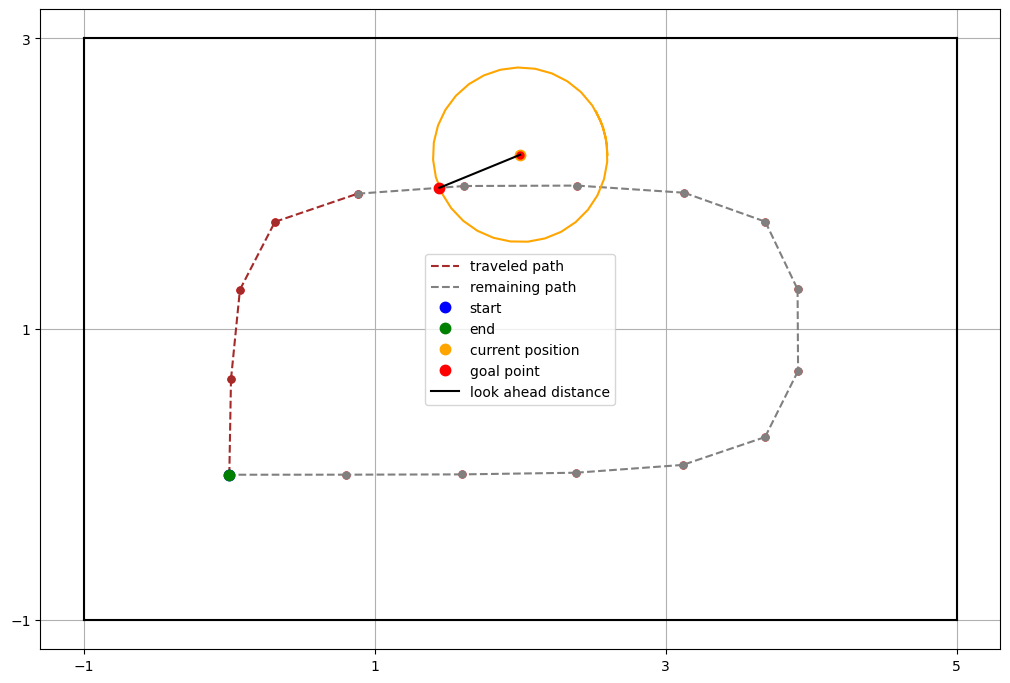

In [24]:
path1 = [[0.0, 0.0], [0.011580143395790051, 0.6570165243709267], [0.07307496243411533, 1.2724369146199181], [0.3136756819515748, 1.7385910188236868], [0.8813313906933087, 1.9320292911046681], [1.6153051608455251, 1.9849785681091774], [2.391094224224885, 1.9878393390954208], [3.12721333474683, 1.938831731115573], [3.685011039017028, 1.7396821576569221], [3.9068092597113266, 1.275245079016133], [3.9102406525571713, 0.7136897450501469], [3.68346383786099, 0.2590283720040381], [3.1181273273535957, 0.06751996250999465], [2.3832776875784316, 0.013841087641154892], [1.5971423891000605, 0.0023698980178599423], [0.7995795475309813, 0.0003490964043320208], [0, 0]]

# helper functions
def pt_to_pt_distance (pt1,pt2) :
    distance = np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)
    return distance

# returns -1 if num is negative, 1 otherwise
def sgn (num):
    if num >= 0:
        return 1
    else:
        return -1
        
def goal_pt_search (path, currentPos, lookAheadDis, lastFoundIndex) :

    # extract currentX and currentY
    currentX = currentPos[0]
    currentY = currentPos[1]
    
    # initialize goalPt in case no intersection is found
    goalPt = [None, None]
    
    # use for loop to search intersections
    intersectFound = False
    startingIndex = lastFoundIndex
    
    for i in range (startingIndex, len(path)-1):
    
        # beginning of line-circle intersection code
        x1 = path[i][0] - currentX
        y1 = path[i][1] - currentY
        x2 = path[i+1][0] - currentX
        y2 = path[i+1][1] - currentY
        dx = x2 - x1
        dy = y2 - y1
        dr = math.sqrt (dx**2 + dy**2)
        D = x1*y2 - x2*y1
        discriminant = (lookAheadDis**2) * (dr**2) - D**2
        
        if discriminant >= 0:
            sol_x1 = (D * dy + sgn(dy) * dx * np.sqrt(discriminant)) / dr**2
            sol_x2 = (D * dy - sgn(dy) * dx * np.sqrt(discriminant)) / dr**2
            sol_y1 = (- D * dx + abs(dy) * np.sqrt(discriminant)) / dr**2
            sol_y2 = (- D * dx - abs(dy) * np.sqrt(discriminant)) / dr**2
            
            sol_pt1 = [sol_x1 + currentX, sol_y1 + currentY] 
            sol_pt2 = [sol_x2 + currentX, sol_y2 + currentY]
            # end of line-circle intersection code
            
            minX = min(path[i][0], path[i+1][0])
            minY = min(path[i][1], path[i+1][1])
            maxX = max(path[i][0], path[i+1][0])
            maxY = max(path[i][1], path[i+1][1])
            
            # if one or both of the solutions are in range
            if ((minX <= sol_pt1[0] <= maxX) and (minY <= sol_pt1[1] <= maxY)) or ((minX <= sol_pt2[0] <= maxX) and (minY <= sol_pt2[1] <= maxY)):
            
                foundIntersection = True
            
                # if both solutions are in range, check which one is better
                if ((minX <= sol_pt1[0] <= maxX) and (minY <= sol_pt1[1] <= maxY)) and ((minX <= sol_pt2[0] <= maxX) and (minY <= sol_pt2[1] <= maxY)):
                    # make the decision by comparing the distance between the intersections and the next point in path
                    if pt_to_pt_distance(sol_pt1, path[i+1]) < pt_to_pt_distance(sol_pt2, path[i+1]):
                        goalPt = sol_pt1
                    else:
                        goalPt = sol_pt2
                
                # if not both solutions are in range, take the one that's in range
                else: 
                    # if solution pt1 is in range, set that as goal point
                    if (minX <= sol_pt1[0] <= maxX) and (minY <= sol_pt1[1] <= maxY):
                        goalPt = sol_pt1
                    else:
                        goalPt = sol_pt2 
                
                # only exit loop if the solution pt found is closer to the next pt in path than the current pos
                if pt_to_pt_distance (goalPt, path[i+1]) < pt_to_pt_distance ([currentX, currentY], path[i+1]):
                    # update lastFoundIndex and exit
                    lastFoundIndex = i
                    break
                else:      
                    # in case for some reason the robot cannot find intersection in the next path segment, but we also don't want it to go backward
                    lastFoundIndex = i+1
                    
            # if no solutions are in range
            else:
                    foundIntersection = False
                    # no new intersection found, potentially deviated from the path
                    # follow path[lastFoundIndex]
                    goalPt = [path[lastFoundIndex][0], path[lastFoundIndex][1]]
                    
    # visualize outcome
    # ---------------------------------------------------------------------------------------------------------------------------------------
    # traveled path (path omitted for searching) will be marked in brown
    field = plt.figure()
    xscale,yscale = (1.5, 1.5) # <- modify these values to scale the plot
    path_ax = field.add_axes([0,0,xscale,yscale])
    add_complicated_line(path[0:lastFoundIndex+1],'--','brown','traveled path')
    add_complicated_line(path[lastFoundIndex:len(path)],'--','grey','remaining path')
    highlight_points(path[0:lastFoundIndex], 'brown')
    highlight_points(path[lastFoundIndex:len(path)], 'grey')
    
    xMin, yMin, xMax, yMax = (-1, -1, 5, 3)  # <- modify these values to set plot boundaries
                                             # (minX, minY, maxX, maxY)

    # plot field
    path_ax.plot([xMin,xMax],[yMin,yMin],color='black')
    path_ax.plot([xMin,xMin],[yMin,yMax],color='black')
    path_ax.plot([xMax,xMax],[yMin,yMax],color='black')
    path_ax.plot([xMax,xMin],[yMax,yMax],color='black')
    
    # set grid
    xTicks = np.arange(xMin, xMax+1, 2)
    yTicks = np.arange(yMin, yMax+1, 2)
    
    path_ax.set_xticks(xTicks)
    path_ax.set_yticks(yTicks)
    path_ax.grid(True)
    
    path_ax.set_xlim(xMin-0.25,xMax+0.25)
    path_ax.set_ylim(yMin-0.25,yMax+0.25)
    
    # plot start and end
    path_ax.plot(path[0][0],path[0][1],'.',color='blue',markersize=15,label='start')
    path_ax.plot(path[-1][0],path[-1][1],'.',color='green',markersize=15,label='end')
    
    # plot current position and goal point
    draw_circle (currentX, currentY, lookAheadDis, 'orange')
    plt.plot (currentX,currentY, '.', markersize=15, color='orange', label='current position')  
    if goalPt != [None, None] :
        plt.plot (goalPt[0], goalPt[1], '.', markersize=15, color='red', label='goal point')
        add_complicated_line([currentPos, goalPt], '-', 'black', 'look ahead distance')
        print('Goal point found at {}'.format(goalPt))
    else:
        print('No intersection found!')
        
    path_ax.legend()

# call the function to see the results
goal_pt_search (path1, [2, 2.2], 0.6, 4)

In [5]:
path1 = [[0.0, 0.0], [0.571194595265405, -0.4277145118491421], [1.1417537280142898, -0.8531042347260006], [1.7098876452457967, -1.2696346390611464], [2.2705328851607995, -1.6588899151216996], [2.8121159420106827, -1.9791445882187304], [3.314589274316711, -2.159795566252656], [3.7538316863009027, -2.1224619985315876], [4.112485112342358, -1.8323249172947023], [4.383456805594431, -1.3292669972090994], [4.557386228943757, -0.6928302521681386], [4.617455513800438, 0.00274597627737883], [4.55408382321606, 0.6984486966257434], [4.376054025556597, 1.3330664239172116], [4.096280073621794, 1.827159263675668], [3.719737492364894, 2.097949296701878], [3.25277928312066, 2.108933125822431], [2.7154386886417314, 1.9004760368018616], [2.1347012144725985, 1.552342808106984], [1.5324590525923942, 1.134035376721349], [0.9214084611203568, 0.6867933269918683], [0.30732366808208345, 0.22955002391894264], [-0.3075127599907512, -0.2301742560363831], [-0.9218413719658775, -0.6882173194028102], [-1.5334674079795052, -1.1373288016589413], [-2.1365993767877467, -1.5584414896876835], [-2.7180981380280307, -1.9086314914221845], [-3.2552809639439704, -2.1153141204181285], [-3.721102967810494, -2.0979137913841046], [-4.096907306768644, -1.8206318841755131], [-4.377088212533404, -1.324440752295139], [-4.555249804461285, -0.6910016662308593], [-4.617336323713965, 0.003734984720118972], [-4.555948690867849, 0.7001491248072772], [-4.382109193278264, 1.3376838311365633], [-4.111620918085742, 1.8386823176628544], [-3.7524648889185794, 2.1224985058331005], [-3.3123191098095615, 2.153588702898333], [-2.80975246649598, 1.9712114570096653], [-2.268856462266256, 1.652958931009528], [-1.709001159778989, 1.2664395490411673], [-1.1413833971013372, 0.8517589252820573], [-0.5710732645795573, 0.4272721367616211], [0, 0], [0.571194595265405, -0.4277145118491421]]
# path 1 = [[-4,-2],[-4,2],[4,2],[4,-2],[-4,-2]]

# helper functions
def pt_to_pt_distance (pt1,pt2):
    distance = np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)
    return distance

# returns -1 if num is negative, 1 otherwise
def sgn (num):
  if num >= 0:
    return 1
  else:
    return -1

# THIS IS DIFFERENT THAN BEFORE! initialize variables here
# you can also change the Kp constant which is located at line 113
currentPos = [0, 0]
currentHeading = 330
lastFoundIndex = 0
lookAheadDis = 0.8
linearVel = 100

# set this to true if you use rotations
using_rotation = False

# this determines how long (how many frames) the animation will run. 400 frames takes around 30 seconds.
numOfFrames = 400

# this function needs to return 3 things IN ORDER: goalPt, lastFoundIndex, turnVel
# think about this function as a snapshot in a while loop
# given all information about the robot's current state, what should be the goalPt, lastFoundIndex, and turnVel?
# the LFindex takes in the value of lastFoundIndex as input. Looking at it now I can't remember why I have it.
# it is this way because I don't want the global lastFoundIndex to get modified in this function, instead, this function returns the updated lastFoundIndex value 
# this function will be feed into another function for creating animation
def pure_pursuit_step (path, currentPos, currentHeading, lookAheadDis, LFindex) :

  # extract currentX and currentY
  currentX = currentPos[0]
  currentY = currentPos[1]

  # use for loop to search intersections
  lastFoundIndex = LFindex
  intersectFound = False
  startingIndex = lastFoundIndex

  for i in range (startingIndex, len(path)-1):

    # beginning of line-circle intersection code
    x1 = path[i][0] - currentX
    y1 = path[i][1] - currentY
    x2 = path[i+1][0] - currentX
    y2 = path[i+1][1] - currentY
    dx = x2 - x1
    dy = y2 - y1
    dr = math.sqrt (dx**2 + dy**2)
    D = x1*y2 - x2*y1
    discriminant = (lookAheadDis**2) * (dr**2) - D**2

    if discriminant >= 0:
      sol_x1 = (D * dy + sgn(dy) * dx * np.sqrt(discriminant)) / dr**2
      sol_x2 = (D * dy - sgn(dy) * dx * np.sqrt(discriminant)) / dr**2
      sol_y1 = (- D * dx + abs(dy) * np.sqrt(discriminant)) / dr**2
      sol_y2 = (- D * dx - abs(dy) * np.sqrt(discriminant)) / dr**2

      sol_pt1 = [sol_x1 + currentX, sol_y1 + currentY]
      sol_pt2 = [sol_x2 + currentX, sol_y2 + currentY]
      # end of line-circle intersection code

      minX = min(path[i][0], path[i+1][0])
      minY = min(path[i][1], path[i+1][1])
      maxX = max(path[i][0], path[i+1][0])
      maxY = max(path[i][1], path[i+1][1])

      # if one or both of the solutions are in range
      if ((minX <= sol_pt1[0] <= maxX) and (minY <= sol_pt1[1] <= maxY)) or ((minX <= sol_pt2[0] <= maxX) and (minY <= sol_pt2[1] <= maxY)):

        foundIntersection = True

        # if both solutions are in range, check which one is better
        if ((minX <= sol_pt1[0] <= maxX) and (minY <= sol_pt1[1] <= maxY)) and ((minX <= sol_pt2[0] <= maxX) and (minY <= sol_pt2[1] <= maxY)):
          # make the decision by compare the distance between the intersections and the next point in path
          if pt_to_pt_distance(sol_pt1, path[i+1]) < pt_to_pt_distance(sol_pt2, path[i+1]):
            goalPt = sol_pt1
          else:
            goalPt = sol_pt2
        
        # if not both solutions are in range, take the one that's in range
        else:
          # if solution pt1 is in range, set that as goal point
          if (minX <= sol_pt1[0] <= maxX) and (minY <= sol_pt1[1] <= maxY):
            goalPt = sol_pt1
          else:
            goalPt = sol_pt2
          
        # only exit loop if the solution pt found is closer to the next pt in path than the current pos
        if pt_to_pt_distance (goalPt, path[i+1]) < pt_to_pt_distance ([currentX, currentY], path[i+1]):
          # update lastFoundIndex and exit
          lastFoundIndex = i
          break
        else:
          # in case for some reason the robot cannot find intersection in the next path segment, but we also don't want it to go backward
          lastFoundIndex = i+1
        
      # if no solutions are in range
      else:
        foundIntersection = False
        # no new intersection found, potentially deviated from the path
        # follow path[lastFoundIndex]
        goalPt = [path[lastFoundIndex][0], path[lastFoundIndex][1]]

  # obtained goal point, now compute turn vel
  # initialize proportional controller constant
  Kp = 3

  # calculate absTargetAngle with the atan2 function
  absTargetAngle = math.atan2 (goalPt[1]-currentPos[1], goalPt[0]-currentPos[0]) *180/pi
  if absTargetAngle < 0: absTargetAngle += 360

  # compute turn error by finding the minimum angle
  turnError = absTargetAngle - currentHeading
  if turnError > 180 or turnError < -180 :
    turnError = -1 * sgn(turnError) * (360 - abs(turnError))
  
  # apply proportional controller
  turnVel = Kp*turnError
  
  return goalPt, lastFoundIndex, turnVel

# the code below is for animation
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------
# for the sake of my sanity
pi = np.pi
# animation
fig = plt.figure()
trajectory_lines = plt.plot([], '-', color='orange', linewidth = 4)
trajectory_line = trajectory_lines[0]
heading_lines = plt.plot([], '-', color='red')
heading_line = heading_lines[0]
connection_lines = plt.plot([], '-', color='green')
connection_line = connection_lines[0]
poses = plt.plot([], 'o', color='black', markersize=10)
pose = poses[0]

# other setup, stationary stuff for example
# plt.plot([initX], [initY], 'x',color='red',markersize=10)
# plt.plot([path1[-1][0]], [path1[-1][1]], 'x',color='red',markersize=10)
pathForGraph = np.array(path1)
plt.plot(pathForGraph[:, 0], pathForGraph[:, 1], '--', color='grey')
# plt.plot(pathForGraph[:, 0], pathForGraph[:, 1], 'o', color='purple', markersize=2)

plt.axis("scaled")
plt.xlim (-6, 6)
plt.ylim (-4, 4)
dt = 50
xs = [currentPos[0]]
ys = [currentPos[1]]

def pure_pursuit_animation (frame) :
  # define globals
  global currentPos
  global currentHeading
  global lastFoundIndex
  global linearVel

  # for the animation to loop
  if lastFoundIndex >= len(path1)-2 : lastFoundIndex = 0

  # call pure_pursuit_step to get info
  goalPt, lastFoundIndex, turnVel = pure_pursuit_step (path1, currentPos, currentHeading, lookAheadDis, lastFoundIndex)
  print(goalPt, lastFoundIndex, turnVel)

  # model: 200rpm drive with 18" width
  #               rpm   /s  circ   feet
  maxLinVelfeet = 200 / 60 * pi*4 / 12
  #               rpm   /s  center angle   deg
  maxTurnVelDeg = 200 / 60 * pi*4 / 9 *180/pi

  # update x and y, but x and y stays constant here
  stepDis = linearVel/100 * maxLinVelfeet * dt/1000
  currentPos[0] += stepDis * np.cos(currentHeading*pi/180)
  currentPos[1] += stepDis * np.sin(currentHeading*pi/180)

  heading_line.set_data ([currentPos[0], currentPos[0] + 0.5*np.cos(currentHeading/180*pi)], [currentPos[1], currentPos[1] + 0.5*np.sin(currentHeading/180*pi)])
  connection_line.set_data ([currentPos[0], goalPt[0]], [currentPos[1], goalPt[1]])

  currentHeading += turnVel/100 * maxTurnVelDeg * dt/1000
  if using_rotation == False :
    currentHeading = currentHeading%360
    if currentHeading < 0: currentHeading += 360

  # rest of the animation code
  xs.append(currentPos[0])
  ys.append(currentPos[1])

  pose.set_data ((currentPos[0], currentPos[1]))
  trajectory_line.set_data (xs, ys)

anim = animation.FuncAnimation (fig, pure_pursuit_animation, frames = numOfFrames, interval = 50)
video = anim.to_html5_video()
html = display.HTML (video)
display.display(html)
plt.close()

[0.6404742115085821, -0.4793670664453911] 1 -20.439766430093414
[0.779201632819966, -0.5827975715759499] 1 -16.644131316135486
[0.918448058068673, -0.6866150286075436] 1 -12.591993413558612
[1.0581079407497276, -0.790740745611632] 1 -8.70975399412987
[1.198380273733083, -0.8946202880172537] 2 -5.1593788202528685
[1.3392896079258523, -0.9979287161285676] 2 -2.0879592998639964
[1.480195319450773, -1.1012344882616731] 2 0.2050187999108175
[1.621049281081872, -1.204502319684773] 2 1.762435659270409
[1.7628574597825533, -1.3064115138340553] 3 3.035227104498631
[1.9062949829142612, -1.406000003468855] 3 4.253878803979546
[2.049643044705464, -1.5055263802088756] 3 4.719505607230644
[2.1929489830926236, -1.6050235107231154] 3 4.627607149081598
[2.3395708224708303, -1.6997141650033676] 4 5.415424104426563
[2.4899103830397733, -1.7886145584233624] 4 6.962494276889288
[2.6400554059408763, -1.8773999157534518] 4 7.416346387559429
[2.790122150903334, -1.966138984937458] 4 7.081252026326581
[2.95419